# Session 6:
## Target: 
Run below versions for 25 epochs and report findings:<br>
with L1 + BN <br>
with L2 + BN <br>
with L1 and L2 with BN <br>
with GBN <br>
with L1 and L2 with GBN <br>

## Results:
Parameters: 8786 <br>
Base Model NLL with BN (Batch size 128) - Train Accuracy / Test Accuracy:  98.72% (max 98.79%) / 99.51% (max 99.53%) <br>
with L1 + BN (Batch size 128) - Train Accuracy / Test Accuracy:  98.78% (max 98.83%) / 99.42% (max 99.43%) <br>
with L2 + BN (Batch size 128) - Train Accuracy / Test Accuracy: 98.77% (max 98.79%) / 99.36% (max 99.38%) <br>
with L1 and L2 with BN (Batch size 128) - Train Accuracy / Test Accuracy: 98.77% (max 98.80%) / 99.42% (max 99.45%) <br>
with GBN (Batch size 512) - Train Accuracy / Test Accuracy: 98.3 (max 98.3) / 99.23 (max 99.24) <br>
with L1 and L2 with GBN (Batch size 512) - Train Accuracy / Test Accuracy: 98.34% (max 98.34%) / 99.18% (max 99.20%) <br>

## Analysis: <br>
- L1 Regularization reduces the gap between train and test accuracies, in this case train accuracy increased and test accuracy decreased. As expected from regularization. <br>

- L2 Regularization reduces the gap between train and test accuracies, in this case train accuracy increased and test accuracy decreased. As expected from regularization. <br>

- L1+L2 regularisation seems to give better results, with test accuracy also increasing while the gap between train and test reduced.

- For L1+L2 with / without GBN, it is seen that Ghost Batch normalisation seems to reduce the gap between train and test accuracy, in this case increased the train accuracy but decreased the test accuracy. <br>
However, if we look NLL + BN and NLL + GBN comparison, NLL + BN gives higher train and test accuracy. <br>


In [1]:
from google.colab import files
import os, sys

if os.path.exists(os.path.join(sys.path[0], 's6model.py')) == False:
  uploaded = files.upload()
if os.path.exists("models") == False:
  !mkdir models

if os.path.exists("graphs") == False:
  !mkdir graphs


Saving config.py to config.py
Saving data_transformer_loader.py to data_transformer_loader.py
Saving graphs_plotter.py to graphs_plotter.py
Saving regularization.py to regularization.py
Saving s6model_Avnish.py to s6model_Avnish.py
Saving s6model.py to s6model.py
Saving test.py to test.py
Saving train.py to train.py


# Import Libraries

In [2]:
# importing all the Python Packages & torch Library.
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from s6model import Net
import config
import train
import test
import data_transformer_loader as dtl
import graphs_plotter as gp


# Print Summary of Model

In [3]:
!pip install torchsummary
from torchsummary import summary
torch.manual_seed(config.SEED)

config.use_cuda = torch.cuda.is_available()
if config.use_cuda:
    torch.cuda.manual_seed(config.SEED)

# this is the batch size , in 1 pas no of images passed together.
print("CUDA Available?", config.use_cuda)

device = torch.device("cuda" if config.use_cuda else "cpu")
model = Net("BN").to(device)
summary(model, input_size=(1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 24, 26, 26]           2,160
              ReLU-6           [-1, 24, 26, 26]               0
       BatchNorm2d-7           [-1, 24, 26, 26]              48
           Dropout-8           [-1, 24, 26, 26]               0
            Conv2d-9           [-1, 10, 26, 26]             240
             ReLU-10           [-1, 10, 26, 26]               0
        MaxPool2d-11           [-1, 10, 13, 13]               0
           Conv2d-12           [-1, 10, 13, 13]             900
             ReLU-13           [-1, 10, 13, 13]               0
      BatchNorm2d-

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
  0%|          | 0/469 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


Approach: Loss, BN =  nll BN epoch = 1


loss=0.04832474887371063 batch_id=468 Train Accuracy=91.69%: 100%|██████████| 469/469 [00:14<00:00, 32.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Test Accuracy: 9824/10000 (98.24%)

Approach: Loss, BN =  nll BN epoch = 2


loss=0.1015397310256958 batch_id=468 Train Accuracy=97.50%: 100%|██████████| 469/469 [00:14<00:00, 32.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Test Accuracy: 9904/10000 (99.04%)

Approach: Loss, BN =  nll BN epoch = 3


loss=0.045692648738622665 batch_id=468 Train Accuracy=97.91%: 100%|██████████| 469/469 [00:14<00:00, 32.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Test Accuracy: 9907/10000 (99.07%)

Approach: Loss, BN =  nll BN epoch = 4


loss=0.06838365644216537 batch_id=468 Train Accuracy=98.22%: 100%|██████████| 469/469 [00:14<00:00, 31.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Test Accuracy: 9909/10000 (99.09%)

Approach: Loss, BN =  nll BN epoch = 5


loss=0.010827011428773403 batch_id=468 Train Accuracy=98.33%: 100%|██████████| 469/469 [00:14<00:00, 32.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Test Accuracy: 9879/10000 (98.79%)

Approach: Loss, BN =  nll BN epoch = 6


loss=0.06964240968227386 batch_id=468 Train Accuracy=98.33%: 100%|██████████| 469/469 [00:14<00:00, 31.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Test Accuracy: 9919/10000 (99.19%)

Approach: Loss, BN =  nll BN epoch = 7


loss=0.01892491988837719 batch_id=468 Train Accuracy=98.77%: 100%|██████████| 469/469 [00:14<00:00, 31.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Test Accuracy: 9934/10000 (99.34%)

Approach: Loss, BN =  nll BN epoch = 8


loss=0.0364554300904274 batch_id=468 Train Accuracy=98.86%: 100%|██████████| 469/469 [00:14<00:00, 31.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Test Accuracy: 9935/10000 (99.35%)

Approach: Loss, BN =  nll BN epoch = 9


loss=0.01761585660278797 batch_id=468 Train Accuracy=98.87%: 100%|██████████| 469/469 [00:14<00:00, 31.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Test Accuracy: 9937/10000 (99.37%)

Approach: Loss, BN =  nll BN epoch = 10


loss=0.07196719199419022 batch_id=468 Train Accuracy=98.92%: 100%|██████████| 469/469 [00:14<00:00, 31.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  nll BN epoch = 11


loss=0.003033926710486412 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:14<00:00, 31.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Test Accuracy: 9944/10000 (99.44%)

Approach: Loss, BN =  nll BN epoch = 12


loss=0.06343873590230942 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:14<00:00, 31.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  nll BN epoch = 13


loss=0.007028305437415838 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:14<00:00, 31.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  nll BN epoch = 14


loss=0.017442116513848305 batch_id=468 Train Accuracy=98.99%: 100%|██████████| 469/469 [00:14<00:00, 31.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  nll BN epoch = 15


loss=0.06346192955970764 batch_id=468 Train Accuracy=98.96%: 100%|██████████| 469/469 [00:14<00:00, 31.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Test Accuracy: 9945/10000 (99.45%)

Approach: Loss, BN =  nll BN epoch = 16


loss=0.02397730015218258 batch_id=468 Train Accuracy=98.96%: 100%|██████████| 469/469 [00:15<00:00, 30.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  nll BN epoch = 17


loss=0.009351682849228382 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:14<00:00, 31.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Test Accuracy: 9942/10000 (99.42%)

Approach: Loss, BN =  nll BN epoch = 18


loss=0.019504820927977562 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:14<00:00, 31.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  nll BN epoch = 19


loss=0.006722204852849245 batch_id=468 Train Accuracy=98.90%: 100%|██████████| 469/469 [00:14<00:00, 31.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  nll BN epoch = 20


loss=0.041506070643663406 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:14<00:00, 31.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Test Accuracy: 9942/10000 (99.42%)

Approach: Loss, BN =  nll BN epoch = 21


loss=0.003189921611919999 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:14<00:00, 32.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  nll BN epoch = 22


loss=0.018822763115167618 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:14<00:00, 31.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  nll BN epoch = 23


loss=0.04436212405562401 batch_id=468 Train Accuracy=98.99%: 100%|██████████| 469/469 [00:14<00:00, 32.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Test Accuracy: 9937/10000 (99.37%)

Approach: Loss, BN =  nll BN epoch = 24


loss=0.010509326122701168 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:14<00:00, 31.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Test Accuracy: 9937/10000 (99.37%)

Approach: Loss, BN =  nll BN epoch = 25


loss=0.023546844720840454 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:14<00:00, 31.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  L1 BN epoch = 1


loss=0.07269302755594254 batch_id=468 Train Accuracy=92.81%: 100%|██████████| 469/469 [00:15<00:00, 29.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0533, Test Accuracy: 9835/10000 (98.35%)

Approach: Loss, BN =  L1 BN epoch = 2


loss=0.11469266563653946 batch_id=468 Train Accuracy=97.66%: 100%|██████████| 469/469 [00:15<00:00, 29.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0436, Test Accuracy: 9867/10000 (98.67%)

Approach: Loss, BN =  L1 BN epoch = 3


loss=0.048737190663814545 batch_id=468 Train Accuracy=98.03%: 100%|██████████| 469/469 [00:15<00:00, 29.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Test Accuracy: 9898/10000 (98.98%)

Approach: Loss, BN =  L1 BN epoch = 4


loss=0.061037883162498474 batch_id=468 Train Accuracy=98.29%: 100%|██████████| 469/469 [00:15<00:00, 29.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0318, Test Accuracy: 9897/10000 (98.97%)

Approach: Loss, BN =  L1 BN epoch = 5


loss=0.11546148359775543 batch_id=468 Train Accuracy=98.32%: 100%|██████████| 469/469 [00:15<00:00, 29.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0306, Test Accuracy: 9889/10000 (98.89%)

Approach: Loss, BN =  L1 BN epoch = 6


loss=0.0422254242002964 batch_id=468 Train Accuracy=98.50%: 100%|██████████| 469/469 [00:15<00:00, 29.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Test Accuracy: 9874/10000 (98.74%)

Approach: Loss, BN =  L1 BN epoch = 7


loss=0.05111721158027649 batch_id=468 Train Accuracy=98.86%: 100%|██████████| 469/469 [00:15<00:00, 29.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Test Accuracy: 9931/10000 (99.31%)

Approach: Loss, BN =  L1 BN epoch = 8


loss=0.03255819156765938 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:15<00:00, 29.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  L1 BN epoch = 9


loss=0.01990632712841034 batch_id=468 Train Accuracy=98.92%: 100%|██████████| 469/469 [00:15<00:00, 29.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  L1 BN epoch = 10


loss=0.06046324968338013 batch_id=468 Train Accuracy=99.00%: 100%|██████████| 469/469 [00:15<00:00, 29.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Test Accuracy: 9945/10000 (99.45%)

Approach: Loss, BN =  L1 BN epoch = 11


loss=0.034037571400403976 batch_id=468 Train Accuracy=99.00%: 100%|██████████| 469/469 [00:16<00:00, 29.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Test Accuracy: 9939/10000 (99.39%)

Approach: Loss, BN =  L1 BN epoch = 12


loss=0.024532340466976166 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:16<00:00, 28.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Test Accuracy: 9945/10000 (99.45%)

Approach: Loss, BN =  L1 BN epoch = 13


loss=0.0696178674697876 batch_id=468 Train Accuracy=99.01%: 100%|██████████| 469/469 [00:16<00:00, 28.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  L1 BN epoch = 14


loss=0.10004047304391861 batch_id=468 Train Accuracy=99.00%: 100%|██████████| 469/469 [00:16<00:00, 28.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1 BN epoch = 15


loss=0.03776056319475174 batch_id=468 Train Accuracy=99.06%: 100%|██████████| 469/469 [00:16<00:00, 29.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1 BN epoch = 16


loss=0.07777490466833115 batch_id=468 Train Accuracy=99.02%: 100%|██████████| 469/469 [00:15<00:00, 29.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1 BN epoch = 17


loss=0.022467859089374542 batch_id=468 Train Accuracy=99.02%: 100%|██████████| 469/469 [00:16<00:00, 29.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1 BN epoch = 18


loss=0.07258181273937225 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:15<00:00, 29.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Test Accuracy: 9945/10000 (99.45%)

Approach: Loss, BN =  L1 BN epoch = 19


loss=0.037562157958745956 batch_id=468 Train Accuracy=99.07%: 100%|██████████| 469/469 [00:15<00:00, 29.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Test Accuracy: 9944/10000 (99.44%)

Approach: Loss, BN =  L1 BN epoch = 20


loss=0.02238352596759796 batch_id=468 Train Accuracy=99.06%: 100%|██████████| 469/469 [00:16<00:00, 29.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Test Accuracy: 9939/10000 (99.39%)

Approach: Loss, BN =  L1 BN epoch = 21


loss=0.026082729920744896 batch_id=468 Train Accuracy=99.07%: 100%|██████████| 469/469 [00:16<00:00, 29.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1 BN epoch = 22


loss=0.01710859127342701 batch_id=468 Train Accuracy=99.01%: 100%|██████████| 469/469 [00:16<00:00, 28.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Test Accuracy: 9939/10000 (99.39%)

Approach: Loss, BN =  L1 BN epoch = 23


loss=0.037831004709005356 batch_id=468 Train Accuracy=99.02%: 100%|██████████| 469/469 [00:16<00:00, 28.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1 BN epoch = 24


loss=0.12528251111507416 batch_id=468 Train Accuracy=99.05%: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  L1 BN epoch = 25


loss=0.05263638123869896 batch_id=468 Train Accuracy=99.00%: 100%|██████████| 469/469 [00:16<00:00, 29.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Test Accuracy: 9939/10000 (99.39%)

Approach: Loss, BN =  L2 BN epoch = 1


loss=0.06513268500566483 batch_id=468 Train Accuracy=92.68%: 100%|██████████| 469/469 [00:15<00:00, 31.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1279, Test Accuracy: 9593/10000 (95.93%)

Approach: Loss, BN =  L2 BN epoch = 2


loss=0.08759921044111252 batch_id=468 Train Accuracy=97.60%: 100%|██████████| 469/469 [00:15<00:00, 31.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Test Accuracy: 9845/10000 (98.45%)

Approach: Loss, BN =  L2 BN epoch = 3


loss=0.0492023266851902 batch_id=468 Train Accuracy=98.04%: 100%|██████████| 469/469 [00:14<00:00, 31.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0465, Test Accuracy: 9853/10000 (98.53%)

Approach: Loss, BN =  L2 BN epoch = 4


loss=0.044598642736673355 batch_id=468 Train Accuracy=98.21%: 100%|██████████| 469/469 [00:15<00:00, 30.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Test Accuracy: 9887/10000 (98.87%)

Approach: Loss, BN =  L2 BN epoch = 5


loss=0.03501547500491142 batch_id=468 Train Accuracy=98.36%: 100%|██████████| 469/469 [00:15<00:00, 31.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Test Accuracy: 9902/10000 (99.02%)

Approach: Loss, BN =  L2 BN epoch = 6


loss=0.015480094589293003 batch_id=468 Train Accuracy=98.44%: 100%|██████████| 469/469 [00:15<00:00, 30.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Test Accuracy: 9926/10000 (99.26%)

Approach: Loss, BN =  L2 BN epoch = 7


loss=0.006322639063000679 batch_id=468 Train Accuracy=98.83%: 100%|██████████| 469/469 [00:15<00:00, 30.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Test Accuracy: 9928/10000 (99.28%)

Approach: Loss, BN =  L2 BN epoch = 8


loss=0.0781107246875763 batch_id=468 Train Accuracy=98.89%: 100%|██████████| 469/469 [00:15<00:00, 29.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Test Accuracy: 9926/10000 (99.26%)

Approach: Loss, BN =  L2 BN epoch = 9


loss=0.016720589250326157 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:15<00:00, 29.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Test Accuracy: 9930/10000 (99.30%)

Approach: Loss, BN =  L2 BN epoch = 10


loss=0.036811161786317825 batch_id=468 Train Accuracy=98.91%: 100%|██████████| 469/469 [00:14<00:00, 31.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Test Accuracy: 9931/10000 (99.31%)

Approach: Loss, BN =  L2 BN epoch = 11


loss=0.04256543517112732 batch_id=468 Train Accuracy=98.88%: 100%|██████████| 469/469 [00:14<00:00, 31.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Test Accuracy: 9929/10000 (99.29%)

Approach: Loss, BN =  L2 BN epoch = 12


loss=0.040648385882377625 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:14<00:00, 31.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  L2 BN epoch = 13


loss=0.03300413861870766 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:14<00:00, 31.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Test Accuracy: 9931/10000 (99.31%)

Approach: Loss, BN =  L2 BN epoch = 14


loss=0.09095745533704758 batch_id=468 Train Accuracy=98.98%: 100%|██████████| 469/469 [00:14<00:00, 31.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Test Accuracy: 9935/10000 (99.35%)

Approach: Loss, BN =  L2 BN epoch = 15


loss=0.03211084380745888 batch_id=468 Train Accuracy=99.00%: 100%|██████████| 469/469 [00:15<00:00, 31.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  L2 BN epoch = 16


loss=0.013200432993471622 batch_id=468 Train Accuracy=98.92%: 100%|██████████| 469/469 [00:14<00:00, 31.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  L2 BN epoch = 17


loss=0.01551202591508627 batch_id=468 Train Accuracy=98.89%: 100%|██████████| 469/469 [00:14<00:00, 31.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Test Accuracy: 9933/10000 (99.33%)

Approach: Loss, BN =  L2 BN epoch = 18


loss=0.02812223695218563 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:14<00:00, 31.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  L2 BN epoch = 19


loss=0.052591633051633835 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:15<00:00, 31.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Test Accuracy: 9933/10000 (99.33%)

Approach: Loss, BN =  L2 BN epoch = 20


loss=0.07310593873262405 batch_id=468 Train Accuracy=98.99%: 100%|██████████| 469/469 [00:15<00:00, 30.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Test Accuracy: 9935/10000 (99.35%)

Approach: Loss, BN =  L2 BN epoch = 21


loss=0.05992690101265907 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:14<00:00, 31.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Test Accuracy: 9931/10000 (99.31%)

Approach: Loss, BN =  L2 BN epoch = 22


loss=0.03323556110262871 batch_id=468 Train Accuracy=99.05%: 100%|██████████| 469/469 [00:15<00:00, 31.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Test Accuracy: 9935/10000 (99.35%)

Approach: Loss, BN =  L2 BN epoch = 23


loss=0.06301514804363251 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:14<00:00, 31.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Test Accuracy: 9930/10000 (99.30%)

Approach: Loss, BN =  L2 BN epoch = 24


loss=0.08973702788352966 batch_id=468 Train Accuracy=99.02%: 100%|██████████| 469/469 [00:14<00:00, 31.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  L2 BN epoch = 25


loss=0.055334363132715225 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:14<00:00, 31.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  L1L2 BN epoch = 1


loss=0.04516937583684921 batch_id=468 Train Accuracy=91.58%: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0580, Test Accuracy: 9822/10000 (98.22%)

Approach: Loss, BN =  L1L2 BN epoch = 2


loss=0.12061123549938202 batch_id=468 Train Accuracy=97.25%: 100%|██████████| 469/469 [00:15<00:00, 29.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0409, Test Accuracy: 9874/10000 (98.74%)

Approach: Loss, BN =  L1L2 BN epoch = 3


loss=0.038315482437610626 batch_id=468 Train Accuracy=97.85%: 100%|██████████| 469/469 [00:15<00:00, 29.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0346, Test Accuracy: 9888/10000 (98.88%)

Approach: Loss, BN =  L1L2 BN epoch = 4


loss=0.06729096919298172 batch_id=468 Train Accuracy=98.06%: 100%|██████████| 469/469 [00:15<00:00, 29.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Test Accuracy: 9896/10000 (98.96%)

Approach: Loss, BN =  L1L2 BN epoch = 5


loss=0.08497165888547897 batch_id=468 Train Accuracy=98.22%: 100%|██████████| 469/469 [00:15<00:00, 29.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0356, Test Accuracy: 9883/10000 (98.83%)

Approach: Loss, BN =  L1L2 BN epoch = 6


loss=0.06344051659107208 batch_id=468 Train Accuracy=98.35%: 100%|██████████| 469/469 [00:15<00:00, 29.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Test Accuracy: 9905/10000 (99.05%)

Approach: Loss, BN =  L1L2 BN epoch = 7


loss=0.0299328975379467 batch_id=468 Train Accuracy=98.69%: 100%|██████████| 469/469 [00:15<00:00, 29.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1L2 BN epoch = 8


loss=0.06394918262958527 batch_id=468 Train Accuracy=98.82%: 100%|██████████| 469/469 [00:15<00:00, 29.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  L1L2 BN epoch = 9


loss=0.03282927721738815 batch_id=468 Train Accuracy=98.91%: 100%|██████████| 469/469 [00:15<00:00, 29.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Test Accuracy: 9944/10000 (99.44%)

Approach: Loss, BN =  L1L2 BN epoch = 10


loss=0.04601616412401199 batch_id=468 Train Accuracy=98.89%: 100%|██████████| 469/469 [00:15<00:00, 29.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Test Accuracy: 9949/10000 (99.49%)

Approach: Loss, BN =  L1L2 BN epoch = 11


loss=0.0297658983618021 batch_id=468 Train Accuracy=98.84%: 100%|██████████| 469/469 [00:15<00:00, 29.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1L2 BN epoch = 12


loss=0.05131983384490013 batch_id=468 Train Accuracy=98.89%: 100%|██████████| 469/469 [00:15<00:00, 29.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Test Accuracy: 9946/10000 (99.46%)

Approach: Loss, BN =  L1L2 BN epoch = 13


loss=0.04810422658920288 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:16<00:00, 28.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1L2 BN epoch = 14


loss=0.031465962529182434 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:15<00:00, 29.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1L2 BN epoch = 15


loss=0.022934310138225555 batch_id=468 Train Accuracy=98.89%: 100%|██████████| 469/469 [00:16<00:00, 29.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Test Accuracy: 9942/10000 (99.42%)

Approach: Loss, BN =  L1L2 BN epoch = 16


loss=0.020220348611474037 batch_id=468 Train Accuracy=98.97%: 100%|██████████| 469/469 [00:16<00:00, 29.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Test Accuracy: 9937/10000 (99.37%)

Approach: Loss, BN =  L1L2 BN epoch = 17


loss=0.031860075891017914 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:16<00:00, 29.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  L1L2 BN epoch = 18


loss=0.10525364428758621 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:16<00:00, 28.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1L2 BN epoch = 19


loss=0.05395226180553436 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:15<00:00, 29.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Test Accuracy: 9945/10000 (99.45%)

Approach: Loss, BN =  L1L2 BN epoch = 20


loss=0.04418740049004555 batch_id=468 Train Accuracy=98.94%: 100%|██████████| 469/469 [00:15<00:00, 29.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1L2 BN epoch = 21


loss=0.0254807248711586 batch_id=468 Train Accuracy=98.91%: 100%|██████████| 469/469 [00:15<00:00, 29.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Test Accuracy: 9942/10000 (99.42%)

Approach: Loss, BN =  L1L2 BN epoch = 22


loss=0.05088205635547638 batch_id=468 Train Accuracy=98.92%: 100%|██████████| 469/469 [00:16<00:00, 29.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Test Accuracy: 9943/10000 (99.43%)

Approach: Loss, BN =  L1L2 BN epoch = 23


loss=0.05615212023258209 batch_id=468 Train Accuracy=98.95%: 100%|██████████| 469/469 [00:16<00:00, 29.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Test Accuracy: 9945/10000 (99.45%)

Approach: Loss, BN =  L1L2 BN epoch = 24


loss=0.026746001094579697 batch_id=468 Train Accuracy=98.91%: 100%|██████████| 469/469 [00:15<00:00, 29.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Test Accuracy: 9941/10000 (99.41%)

Approach: Loss, BN =  L1L2 BN epoch = 25


loss=0.06895182281732559 batch_id=468 Train Accuracy=98.93%: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Test Accuracy: 9942/10000 (99.42%)

Approach: Loss, BN =  nll GBN epoch = 1


loss=0.13000468909740448 batch_id=117 Train Accuracy=82.72%: 100%|██████████| 118/118 [00:11<00:00, 10.08it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0985, Test Accuracy: 9669/10000 (96.69%)

Approach: Loss, BN =  nll GBN epoch = 2


loss=0.053568433970212936 batch_id=117 Train Accuracy=96.96%: 100%|██████████| 118/118 [00:11<00:00, 10.00it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0612, Test Accuracy: 9815/10000 (98.15%)

Approach: Loss, BN =  nll GBN epoch = 3


loss=0.11550042033195496 batch_id=117 Train Accuracy=97.63%: 100%|██████████| 118/118 [00:11<00:00, 10.12it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Test Accuracy: 9892/10000 (98.92%)

Approach: Loss, BN =  nll GBN epoch = 4


loss=0.03553686663508415 batch_id=117 Train Accuracy=97.94%: 100%|██████████| 118/118 [00:11<00:00, 10.03it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0424, Test Accuracy: 9869/10000 (98.69%)

Approach: Loss, BN =  nll GBN epoch = 5


loss=0.015103325247764587 batch_id=117 Train Accuracy=98.26%: 100%|██████████| 118/118 [00:11<00:00, 10.08it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0399, Test Accuracy: 9877/10000 (98.77%)

Approach: Loss, BN =  nll GBN epoch = 6


loss=0.08951371908187866 batch_id=117 Train Accuracy=98.30%: 100%|██████████| 118/118 [00:11<00:00, 10.04it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0366, Test Accuracy: 9894/10000 (98.94%)

Approach: Loss, BN =  nll GBN epoch = 7


loss=0.014004647731781006 batch_id=117 Train Accuracy=98.64%: 100%|██████████| 118/118 [00:11<00:00,  9.94it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Test Accuracy: 9923/10000 (99.23%)

Approach: Loss, BN =  nll GBN epoch = 8


loss=0.042370568960905075 batch_id=117 Train Accuracy=98.75%: 100%|██████████| 118/118 [00:11<00:00, 10.13it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Test Accuracy: 9934/10000 (99.34%)

Approach: Loss, BN =  nll GBN epoch = 9


loss=0.005635775160044432 batch_id=117 Train Accuracy=98.75%: 100%|██████████| 118/118 [00:11<00:00, 10.03it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  nll GBN epoch = 10


loss=0.0630536749958992 batch_id=117 Train Accuracy=98.78%: 100%|██████████| 118/118 [00:11<00:00, 10.10it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Test Accuracy: 9933/10000 (99.33%)

Approach: Loss, BN =  nll GBN epoch = 11


loss=0.016944488510489464 batch_id=117 Train Accuracy=98.85%: 100%|██████████| 118/118 [00:11<00:00, 10.16it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  nll GBN epoch = 12


loss=0.04161171242594719 batch_id=117 Train Accuracy=98.80%: 100%|██████████| 118/118 [00:11<00:00, 10.10it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Test Accuracy: 9934/10000 (99.34%)

Approach: Loss, BN =  nll GBN epoch = 13


loss=0.05763552710413933 batch_id=117 Train Accuracy=98.88%: 100%|██████████| 118/118 [00:11<00:00,  9.98it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Test Accuracy: 9934/10000 (99.34%)

Approach: Loss, BN =  nll GBN epoch = 14


loss=0.09875761717557907 batch_id=117 Train Accuracy=98.84%: 100%|██████████| 118/118 [00:11<00:00, 10.02it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Test Accuracy: 9934/10000 (99.34%)

Approach: Loss, BN =  nll GBN epoch = 15


loss=0.04802417755126953 batch_id=117 Train Accuracy=98.89%: 100%|██████████| 118/118 [00:11<00:00, 10.01it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Test Accuracy: 9934/10000 (99.34%)

Approach: Loss, BN =  nll GBN epoch = 16


loss=0.030985301360487938 batch_id=117 Train Accuracy=98.89%: 100%|██████████| 118/118 [00:11<00:00, 10.05it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Test Accuracy: 9933/10000 (99.33%)

Approach: Loss, BN =  nll GBN epoch = 17


loss=0.039572007954120636 batch_id=117 Train Accuracy=98.85%: 100%|██████████| 118/118 [00:11<00:00, 10.07it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Test Accuracy: 9932/10000 (99.32%)

Approach: Loss, BN =  nll GBN epoch = 18


loss=0.08542626351118088 batch_id=117 Train Accuracy=98.94%: 100%|██████████| 118/118 [00:11<00:00,  9.98it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  nll GBN epoch = 19


loss=0.024761267006397247 batch_id=117 Train Accuracy=98.84%: 100%|██████████| 118/118 [00:11<00:00, 10.12it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  nll GBN epoch = 20


loss=0.05066390335559845 batch_id=117 Train Accuracy=98.86%: 100%|██████████| 118/118 [00:11<00:00, 10.04it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  nll GBN epoch = 21


loss=0.01865459978580475 batch_id=117 Train Accuracy=98.84%: 100%|██████████| 118/118 [00:11<00:00, 10.02it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Test Accuracy: 9938/10000 (99.38%)

Approach: Loss, BN =  nll GBN epoch = 22


loss=0.035163458436727524 batch_id=117 Train Accuracy=98.87%: 100%|██████████| 118/118 [00:11<00:00,  9.93it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Test Accuracy: 9937/10000 (99.37%)

Approach: Loss, BN =  nll GBN epoch = 23


loss=0.06390953809022903 batch_id=117 Train Accuracy=98.89%: 100%|██████████| 118/118 [00:11<00:00, 10.07it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Test Accuracy: 9940/10000 (99.40%)

Approach: Loss, BN =  nll GBN epoch = 24


loss=0.0036833693739026785 batch_id=117 Train Accuracy=98.87%: 100%|██████████| 118/118 [00:11<00:00, 10.00it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Test Accuracy: 9935/10000 (99.35%)

Approach: Loss, BN =  nll GBN epoch = 25


loss=0.015571615658700466 batch_id=117 Train Accuracy=98.81%: 100%|██████████| 118/118 [00:11<00:00, 10.06it/s]



Test set: Average loss: 0.0229, Test Accuracy: 9936/10000 (99.36%)



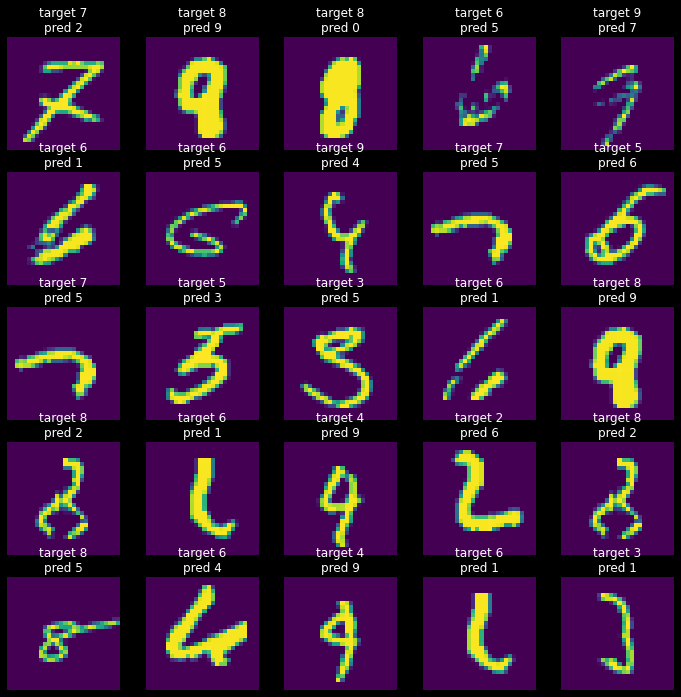

  0%|          | 0/118 [00:00<?, ?it/s]

Approach: Loss, BN =  L1L2 GBN epoch = 1


loss=0.1379985511302948 batch_id=117 Train Accuracy=82.86%: 100%|██████████| 118/118 [00:12<00:00,  9.50it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0866, Test Accuracy: 9753/10000 (97.53%)

Approach: Loss, BN =  L1L2 GBN epoch = 2


loss=0.05534755438566208 batch_id=117 Train Accuracy=97.21%: 100%|██████████| 118/118 [00:12<00:00,  9.39it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0482, Test Accuracy: 9854/10000 (98.54%)

Approach: Loss, BN =  L1L2 GBN epoch = 3


loss=0.07030986249446869 batch_id=117 Train Accuracy=97.84%: 100%|██████████| 118/118 [00:12<00:00,  9.50it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0409, Test Accuracy: 9872/10000 (98.72%)

Approach: Loss, BN =  L1L2 GBN epoch = 4


loss=0.03670239821076393 batch_id=117 Train Accuracy=98.12%: 100%|██████████| 118/118 [00:12<00:00,  9.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0419, Test Accuracy: 9874/10000 (98.74%)

Approach: Loss, BN =  L1L2 GBN epoch = 5


loss=0.09520463645458221 batch_id=117 Train Accuracy=98.31%: 100%|██████████| 118/118 [00:12<00:00,  9.42it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Test Accuracy: 9885/10000 (98.85%)

Approach: Loss, BN =  L1L2 GBN epoch = 6


loss=0.07138729095458984 batch_id=117 Train Accuracy=98.40%: 100%|██████████| 118/118 [00:12<00:00,  9.42it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Test Accuracy: 9885/10000 (98.85%)

Approach: Loss, BN =  L1L2 GBN epoch = 7


loss=0.041105642914772034 batch_id=117 Train Accuracy=98.69%: 100%|██████████| 118/118 [00:12<00:00,  9.40it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Test Accuracy: 9915/10000 (99.15%)

Approach: Loss, BN =  L1L2 GBN epoch = 8


loss=0.1808243691921234 batch_id=117 Train Accuracy=98.81%: 100%|██████████| 118/118 [00:12<00:00,  9.50it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Test Accuracy: 9923/10000 (99.23%)

Approach: Loss, BN =  L1L2 GBN epoch = 9


loss=0.19328539073467255 batch_id=117 Train Accuracy=98.85%: 100%|██████████| 118/118 [00:12<00:00,  9.47it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Test Accuracy: 9919/10000 (99.19%)

Approach: Loss, BN =  L1L2 GBN epoch = 10


loss=0.016793737187981606 batch_id=117 Train Accuracy=98.89%: 100%|██████████| 118/118 [00:12<00:00,  9.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Test Accuracy: 9918/10000 (99.18%)

Approach: Loss, BN =  L1L2 GBN epoch = 11


loss=0.07893956452608109 batch_id=117 Train Accuracy=98.85%: 100%|██████████| 118/118 [00:12<00:00,  9.49it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Test Accuracy: 9921/10000 (99.21%)

Approach: Loss, BN =  L1L2 GBN epoch = 12


loss=0.04272640496492386 batch_id=117 Train Accuracy=98.87%: 100%|██████████| 118/118 [00:12<00:00,  9.50it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Test Accuracy: 9920/10000 (99.20%)

Approach: Loss, BN =  L1L2 GBN epoch = 13


loss=0.06738866865634918 batch_id=117 Train Accuracy=98.86%: 100%|██████████| 118/118 [00:12<00:00,  9.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Test Accuracy: 9925/10000 (99.25%)

Approach: Loss, BN =  L1L2 GBN epoch = 14


loss=0.10853271931409836 batch_id=117 Train Accuracy=98.91%: 100%|██████████| 118/118 [00:12<00:00,  9.47it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Test Accuracy: 9922/10000 (99.22%)

Approach: Loss, BN =  L1L2 GBN epoch = 15


loss=0.1080855056643486 batch_id=117 Train Accuracy=98.90%: 100%|██████████| 118/118 [00:12<00:00,  9.44it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Test Accuracy: 9925/10000 (99.25%)

Approach: Loss, BN =  L1L2 GBN epoch = 16


loss=0.07531169056892395 batch_id=117 Train Accuracy=98.90%: 100%|██████████| 118/118 [00:12<00:00,  9.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Test Accuracy: 9922/10000 (99.22%)

Approach: Loss, BN =  L1L2 GBN epoch = 17


loss=0.07317623496055603 batch_id=117 Train Accuracy=98.91%: 100%|██████████| 118/118 [00:12<00:00,  9.39it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Test Accuracy: 9922/10000 (99.22%)

Approach: Loss, BN =  L1L2 GBN epoch = 18


loss=0.026380721479654312 batch_id=117 Train Accuracy=98.90%: 100%|██████████| 118/118 [00:12<00:00,  9.38it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Test Accuracy: 9929/10000 (99.29%)

Approach: Loss, BN =  L1L2 GBN epoch = 19


loss=0.0531112477183342 batch_id=117 Train Accuracy=98.89%: 100%|██████████| 118/118 [00:12<00:00,  9.46it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Test Accuracy: 9918/10000 (99.18%)

Approach: Loss, BN =  L1L2 GBN epoch = 20


loss=0.06152107194066048 batch_id=117 Train Accuracy=98.88%: 100%|██████████| 118/118 [00:12<00:00,  9.42it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Test Accuracy: 9923/10000 (99.23%)

Approach: Loss, BN =  L1L2 GBN epoch = 21


loss=0.02386525087058544 batch_id=117 Train Accuracy=98.90%: 100%|██████████| 118/118 [00:12<00:00,  9.62it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Test Accuracy: 9920/10000 (99.20%)

Approach: Loss, BN =  L1L2 GBN epoch = 22


loss=0.032783616334199905 batch_id=117 Train Accuracy=98.94%: 100%|██████████| 118/118 [00:12<00:00,  9.72it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Test Accuracy: 9922/10000 (99.22%)

Approach: Loss, BN =  L1L2 GBN epoch = 23


loss=0.030973993241786957 batch_id=117 Train Accuracy=98.89%: 100%|██████████| 118/118 [00:12<00:00,  9.81it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Test Accuracy: 9923/10000 (99.23%)

Approach: Loss, BN =  L1L2 GBN epoch = 24


loss=0.05512089282274246 batch_id=117 Train Accuracy=98.91%: 100%|██████████| 118/118 [00:11<00:00,  9.89it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Test Accuracy: 9929/10000 (99.29%)

Approach: Loss, BN =  L1L2 GBN epoch = 25


loss=0.01846391335129738 batch_id=117 Train Accuracy=98.97%: 100%|██████████| 118/118 [00:11<00:00, 10.03it/s]



Test set: Average loss: 0.0218, Test Accuracy: 9928/10000 (99.28%)



In [4]:
from torch.optim.lr_scheduler import StepLR
import pickle, os

# Load Data from MNIST dataset
dtl.LoadData()

# with L1 + BN
# with L2 + BN
# with L1 and L2 with BN
# with GBN
# with L1 and L2 with GBN 
approach_options = [["nll", "BN"],["L1", "BN"], ["L2", "BN"], ["L1L2", "BN"], ["nll", "GBN"], ["L1L2", "GBN"]]
# approach_options = [["nll", "BN"]]
approach_dicts = {}
gbn_misclassified = []
gbn_predictions = []

for approach in approach_options:
  train.train_losses = []
  test.test_losses = []
  train.train_acc = []
  test.test_acc = []

  # print ("approach = ", approach)
  label = approach[0] + ' with ' + approach[1]
  if approach[1] == "GBN":
    config.batch_size = 512
  else:
    config.batch_size = 128
    #train_loader.batch_size = 512
    #test_loader.batch_size = 512
    # dataloader arguments - something you'll fetch these from cmdprmt

  dtl.InitialiseDataLoaders()
  model = Net(approach[1]).to(device) # move the model to device.

  if (config.overwrite == False) and os.path.isfile(os.path.join(sys.path[0], 'models/EVAS6-' + label + '.pkl')):
    with open (os.path.join(sys.path[0],'models/EVAS6-' + label + '.pkl'),'rb') as f:
      approach_dicts[label] = pickle.load(f)
    #from google.colab import files
    #files.download('EVAS6-' + label + '.pkl')

  else:
    if (approach[0] == "L2") or (approach[0] == "L1L2"):
      optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)  # intiating the SGD optimizer
    else:
      optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)  # intiating the SGD optimizer

    scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
    approach_dict = {}

    for epoch in range(1, config.TOTAL_EPOCHS + 1):
      print("Approach: Loss, BN = ",approach[0], approach[1],"epoch =", epoch)
      train.train(model, device, dtl.train_loader, optimizer, epoch, approach[0])
      scheduler.step()
      test.test(model, device, dtl.test_loader)
    
    # print ("test_acc = ", test.test_acc)

    approach_dict["train_losses"] = train.train_losses
    approach_dict["train_acc"] = train.train_acc
    approach_dict["test_losses"] = test.test_losses
    approach_dict["test_acc"] = test.test_acc
    approach_dicts[label] = approach_dict
    val_data = {'test_acc':test.test_acc,'test_losses':test.test_losses}
    
    pklfilepath = None
    if (sys.path[0] != ''):
      pklfilepath = os.path.join(sys.path[0], 'models/EVAS6-' + label + '.pkl')
    else:
      pklfilepath = os.path.join(os.getcwd(), 'models/EVAS6-' + label + '.pkl')

    if (config.overwrite == True) and os.path.exists(pklfilepath):
      os.remove(pklfilepath) #this deletes the file
    with open(pklfilepath,'wb') as f:
      pickle.dump(val_data,f)
  if (approach[0] == "nll") and (approach[1] == "GBN"):
    #gbn_misclassified, _, gbn_predictions = find_missclassified(model)
    gp.Plot_misclassifed(model, device, dtl.test_loader)




PlotValidationGraph: test_acc:  [98.24, 99.04, 99.07, 99.09, 98.79, 99.19, 99.34, 99.35, 99.37, 99.41, 99.44, 99.4, 99.43, 99.43, 99.45, 99.4, 99.42, 99.41, 99.38, 99.42, 99.4, 99.41, 99.37, 99.37, 99.4]
PlotValidationGraph: test_acc:  [98.35, 98.67, 98.98, 98.97, 98.89, 98.74, 99.31, 99.38, 99.38, 99.45, 99.39, 99.45, 99.4, 99.43, 99.41, 99.41, 99.41, 99.45, 99.44, 99.39, 99.43, 99.39, 99.43, 99.4, 99.39]
PlotValidationGraph: test_acc:  [95.93, 98.45, 98.53, 98.87, 99.02, 99.26, 99.28, 99.26, 99.3, 99.31, 99.29, 99.32, 99.31, 99.35, 99.32, 99.32, 99.33, 99.32, 99.33, 99.35, 99.31, 99.35, 99.3, 99.32, 99.32]
PlotValidationGraph: test_acc:  [98.22, 98.74, 98.88, 98.96, 98.83, 99.05, 99.41, 99.38, 99.44, 99.49, 99.43, 99.46, 99.43, 99.41, 99.42, 99.37, 99.4, 99.43, 99.45, 99.41, 99.42, 99.43, 99.45, 99.41, 99.42]
PlotValidationGraph: test_acc:  [96.69, 98.15, 98.92, 98.69, 98.77, 98.94, 99.23, 99.34, 99.32, 99.33, 99.38, 99.34, 99.34, 99.34, 99.34, 99.33, 99.32, 99.38, 99.38, 99.38, 99.3

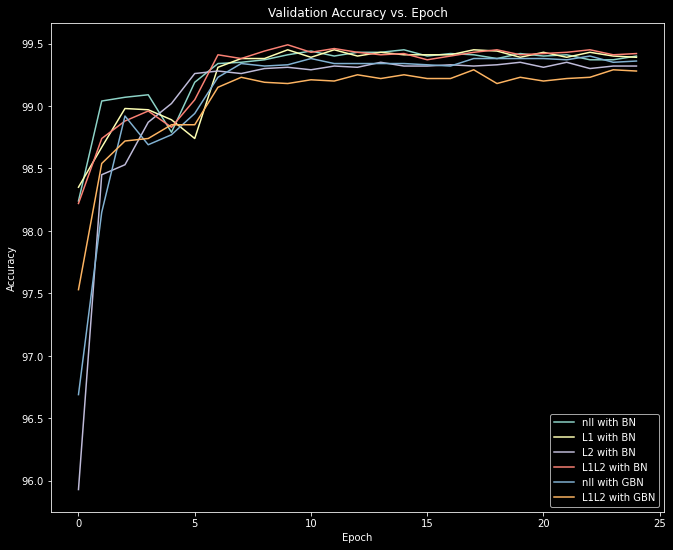

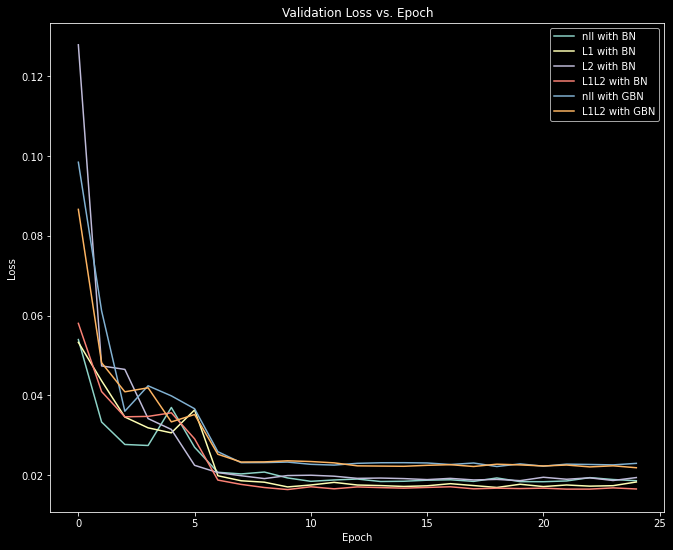

In [5]:

# Plot Graphs
gp.PlotValidationGraph(approach_dicts)
gp.PlotLossGraph(approach_dicts)


In [6]:
!zip -r ./graphs.zip ./graphs/
!zip -r ./models.zip ./models/


  adding: graphs/ (stored 0%)
  adding: graphs/evas6_misclassified.png (deflated 23%)
  adding: graphs/evas6-loss.png (deflated 11%)
  adding: graphs/evas6-acc.png (deflated 11%)
  adding: models/ (stored 0%)
  adding: models/EVAS6-nll with BN.pkl (deflated 26%)
  adding: models/EVAS6-L1 with BN.pkl (deflated 26%)
  adding: models/EVAS6-L1L2 with BN.pkl (deflated 28%)
  adding: models/EVAS6-nll with GBN.pkl (deflated 28%)
  adding: models/EVAS6-L1L2 with GBN.pkl (deflated 26%)
  adding: models/EVAS6-L2 with BN.pkl (deflated 28%)


In [7]:
from google.colab import files
files.download('graphs.zip')
files.download('models.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>